In [1]:
# preparing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir(r"C:\Users\ruben\Desktop\DataPortfolio\Datasets\Bitcoin")

['bitcoin_analysis_Shan_Singh.ipynb', 'bitcoin_price_Training - Training.csv']

In [3]:
btc_df = pd.read_csv(r"C:\Users\ruben\Desktop\DataPortfolio\Datasets\Bitcoin\bitcoin_price_Training - Training.csv")

In [29]:
btc_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [9]:
btc_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [10]:
btc_df.shape

(1556, 7)

In [11]:
# to check null values and the types of objects we run .info

In [12]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [16]:
# to convet the date column to a datetime object

In [10]:
btc_df["Date"] = pd.to_datetime(btc_df["Date"])
btc_df["Date"][0]

Timestamp('2017-07-31 00:00:00')

In [41]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1313 non-null   float64       
 6   Market Cap  1556 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 85.2 KB


In [17]:
# to explore some metrics, we use .describe() with transpose aka switching columns with rows (.T)
# to ignore the date column, we use the .iloc function

In [7]:
btc_df.iloc[:, 1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [30]:
# examples of insights:

# the average value at Open is 582,63
# the variation at High is 542,99
# 25% of the values at Low is < 248,84
# 75% of the Values at Close is < 663,40

In [12]:
btc_df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [36]:
# the data is collected between 28th of April, 2013 and 31st of July, 2017

In [37]:
# to check duplicates:

In [38]:
btc_df.duplicated().sum()

0

In [42]:
# QUESTION: what was the change of stock price overtime?

In [44]:
# to achieve this, a good approach would be a line chart overtime for the 4 metrics available
# an image of 4 graphs with the dimensions 2x2 and correlation to the index of each metric

In [45]:
# resetting index of the df in order to oldest values show up first

In [13]:
btc_df = btc_df.sort_index(ascending=False).reset_index()

In [50]:
#to drop the index column

In [14]:
btc_df.drop('index', axis=1, inplace=True)

In [15]:
btc_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [57]:
btc_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [ ]:
# since the subplot structure requires index to start with 1, we call that attribute into the enumerate()
# to expand the graphs, we use figure()

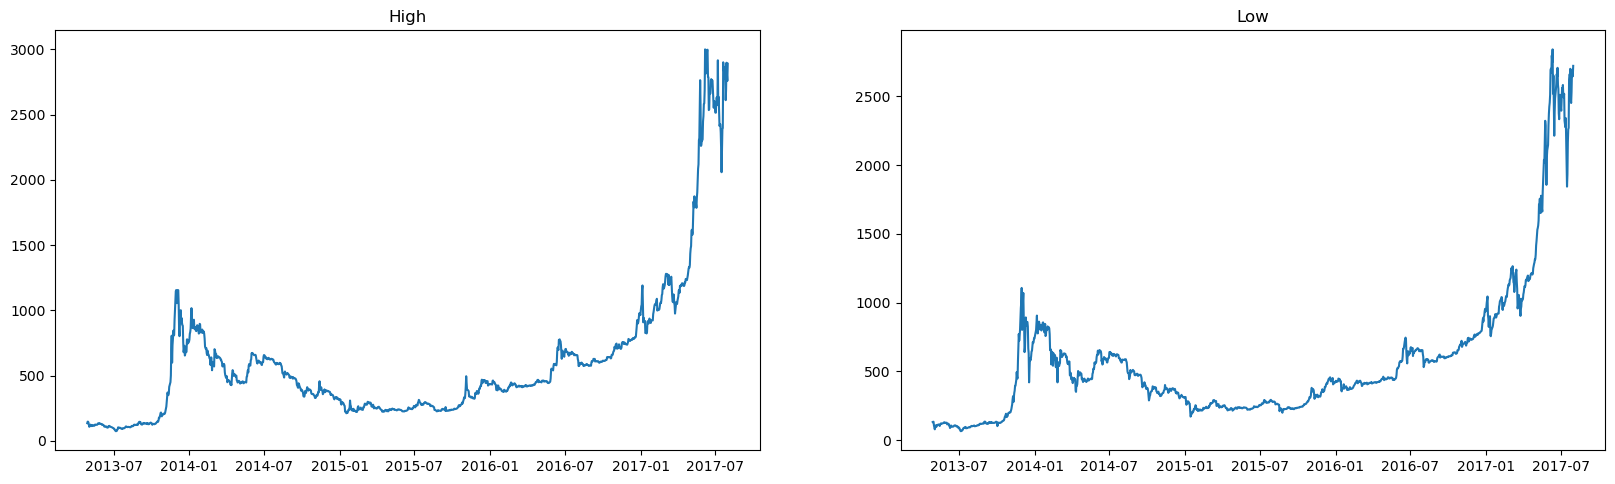

In [12]:
plt.figure(figsize=(20,12))

for index, col in enumerate (['High', 'Low'], 1):
    plt.subplot(2,2,index)
    # we want a graph with date as x and metric as y
    plt.plot(btc_df['Date'], btc_df[col])
    # to have the metric as title
    plt.title(col)

In [63]:
# we have 2 line charts showing the trend on our 4 metrics

In [64]:
# ANSWER: we have a big spike of value on both charts from 2017-01 to 2017-07

In [65]:
# QUESTION: extract several insights from the dataset
# we will use a candlestick plot: the bigger the "candles", the higher the variation

In [13]:
# how to create a data sample

In [14]:
btc_sample = btc_df[0:50]

In [121]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [122]:
init_notebook_mode(connected=True)

In [38]:
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Market Cap', 'Volume']
btc_df[cols_to_convert] = btc_df[cols_to_convert].replace({'-': None, ',': ''}, regex=True).astype(float)

In [39]:
btc_df.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

In [40]:
btc_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,144.00,146.93,134.05,139.00,NaN,1.597780e+09


In [62]:
fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=btc_df['Date'], 
    open=btc_df['Open'],
    high=btc_df['High'],
    low=btc_df['Low'],
    close=btc_df['Close']
))


In [63]:
# INSIGHTS
# A clear upward trend starting from late April to late May, where Bitcoin's price increased steadily.
# Around late May, there’s a sharp increase followed by a drop, suggesting a period of high volatility
# The price peaked at around $2,600 before experiencing a pullback: this suggests a strong resistance point, 
#   leading to profit-taking and a temporary decline
# On May 27 we have a large red candle, indicating a strong sell-off
# In mid June, the chart shows a sideways movement suggesting:
#   - that the market was consolidating
#   - traders where waiting for further signals before deciding on the next trend direction

In [64]:
# QUESTION: Analyze the high price in a deep fashion

In [65]:
# using a log plot:
#   - recommended if you have outliers (extremely high or low values)
#   - recommeded to catch smoother increases and decreases

<Axes: >

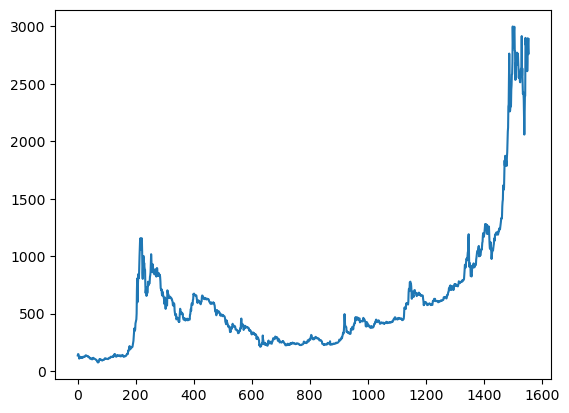

In [67]:
btc_df['High'].plot()

In [68]:
# to have dates in the X axis

<Axes: xlabel='Date'>

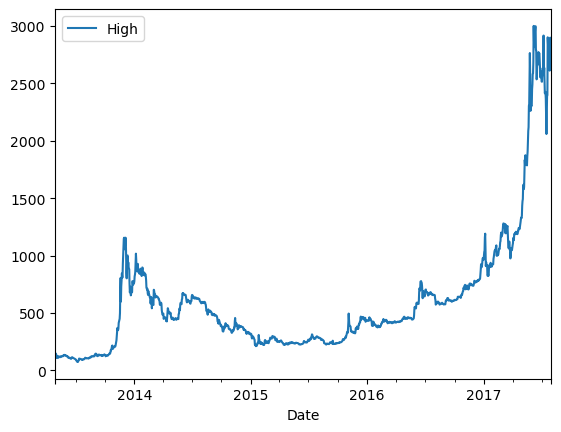

In [69]:
btc_df.plot(x='Date', y='High')

In [70]:
# deploy the previous graph + the log one

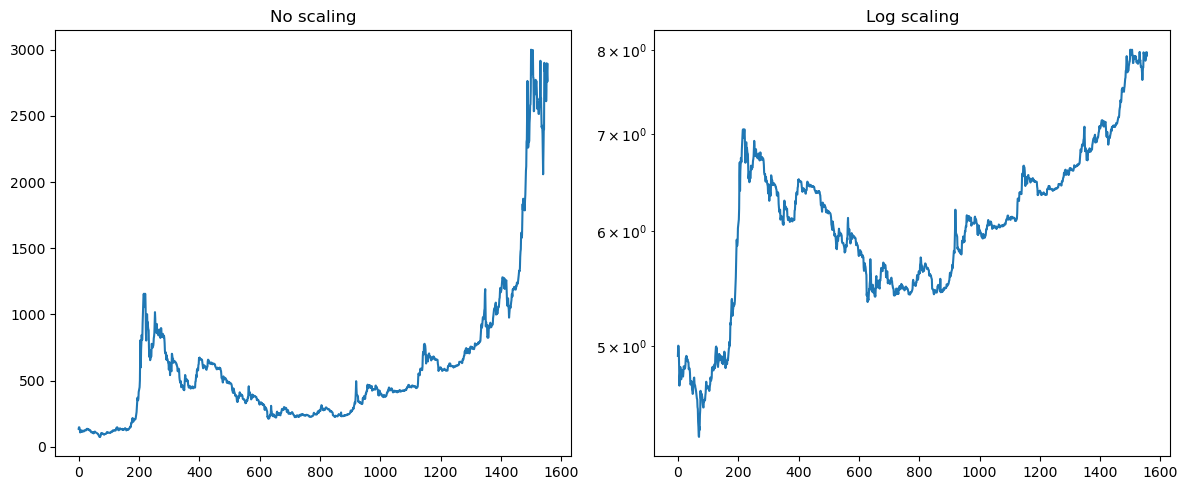

In [83]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
btc_df['High'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(btc_df['High']).plot()
plt.title('Log scaling')
plt.yscale('log')

plt.tight_layout()

In [84]:
#DEPTH ANALYSIS
# the log graph shows that:
# - a more consistent growth trend rather than sudden, isolated spikes
# - easier to compare different growth trend (normalizes % gains rather than absolute price differences)
# - early fluctuations become more pronounced, showing that %-based changes were just as significant in earlier
#   periods as in later ones

In [85]:
#QUESTION: Analyse High price yearly, quarterly and monthly

In [86]:
btc_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,144.00,146.93,134.05,139.00,NaN,1.597780e+09


In [87]:
# we have to index the date column in order to perform the analyzes

In [88]:
btc_df.set_index('Date', inplace=True)

In [89]:
btc_df.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN,1.500520e+09
2013-04-29,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2013-04-30,144.00,146.93,134.05,139.00,NaN,1.597780e+09


In [90]:
# to calculate the mean per year

In [95]:
btc_df['High'].resample('YE').mean()

Date
2013-12-31     269.322379
2014-12-31     540.312000
2015-12-31     278.152110
2016-12-31     574.302377
2017-12-31    1673.353066
Freq: YE-DEC, Name: High, dtype: float64

<Axes: xlabel='Date'>

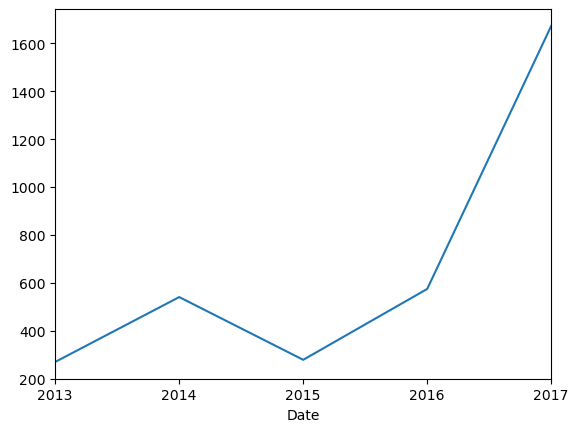

In [97]:
btc_df['High'].resample('YE').mean().plot()

In [94]:
# in average, the year 2017 has the higher average prices

<Axes: xlabel='Date'>

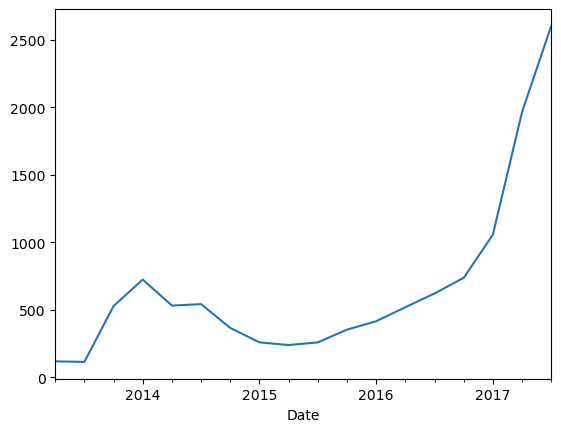

In [99]:
btc_df['High'].resample('QE').mean().plot()

In [100]:
# we can know analyse the trend of the High values by Quarter

In [101]:
#QUESTION: Analyse daily change on the High column

In [102]:
# to compute the % change

In [109]:
btc_df['% change'] = btc_df['High'].pct_change()*100
btc_df['% change']

Date
2013-04-28          NaN
2013-04-29     8.464480
2013-04-30    -0.379687
2013-05-01    -4.791397
2013-05-02   -10.215169
                ...    
2017-07-27     3.162298
2017-07-28     7.579122
2017-07-29    -3.060967
2017-07-30    -1.788334
2017-07-31     4.752169
Name: % change, Length: 1556, dtype: float64

In [104]:
# from 28-04 to 29-04, we have a +8,46% value increase
# from 29-04 to 30-04, we haev a -0,38% value decrease...

In [118]:
import cufflinks as cf

In [119]:
cf.go_offline()

In [113]:
type(btc_df['% change'])

pandas.core.series.Series

In [125]:
import plotly.graph_objs as go

# Create a trace for the data
trace = go.Scatter(
    x=btc_df.index,
    y=btc_df['% change'],
    mode='lines',
    name='% change'
)

# Define the layout with titlefont explicitly set
layout = go.Layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='% Change')
)

# Create the figure and plot it
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
# we can now visually analyse the price variation per day